In [13]:
import ast
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score

# Reload the CheXpert predictions file after the state reset
# chexpert_file_path = r'C:\Users\Vishi\VSC Codes\CheXzero Finetune\VLP-Seminar\predictions\chexpert\chZ_ft_preds_chP_test.csv'
chexpert_file_path = r'C:\Users\Vishi\VSC Codes\CheXzero Finetune\VLP-Seminar\predictions\chexpert\vanilla_chZ_chP_preds.csv'
df_chexpert = pd.read_csv(chexpert_file_path)


# Convert string representations of lists to actual lists
df_chexpert['preds'] = df_chexpert['preds'].apply(ast.literal_eval)
df_chexpert['y'] = df_chexpert['y'].apply(ast.literal_eval)

# Convert lists to numpy arrays
y_true = np.array(df_chexpert['y'].tolist())
y_pred = np.array(df_chexpert['preds'].tolist())

# Number of pathologies
num_classes = y_true.shape[1]

# Calculate metrics for each pathology
metrics = {
    'accuracy': [],
    'precision': [],
    'f1_score': [],
    'auc': []
}

for i in range(num_classes):
    metrics['accuracy'].append(accuracy_score(y_true[:, i], y_pred[:, i]))
    metrics['precision'].append(precision_score(y_true[:, i], y_pred[:, i], zero_division=0))
    metrics['f1_score'].append(f1_score(y_true[:, i], y_pred[:, i], zero_division=0))
    metrics['auc'].append(roc_auc_score(y_true[:, i], y_pred[:, i]))

# Display results
metrics_df = pd.DataFrame(metrics, index=[f'Pathology_{i+1}' for i in range(num_classes)])
metrics_df


,accuracy,precision,f1_score,auc
Pathology_1,0.544554,0.435115,0.553398,0.588661
Pathology_2,0.514851,0.271429,0.279412,0.456439
Pathology_3,0.589109,0.140845,0.194175,0.476838
Pathology_4,0.242574,0.215385,0.354430,0.521875
Pathology_5,0.396040,0.323171,0.464912,0.511889


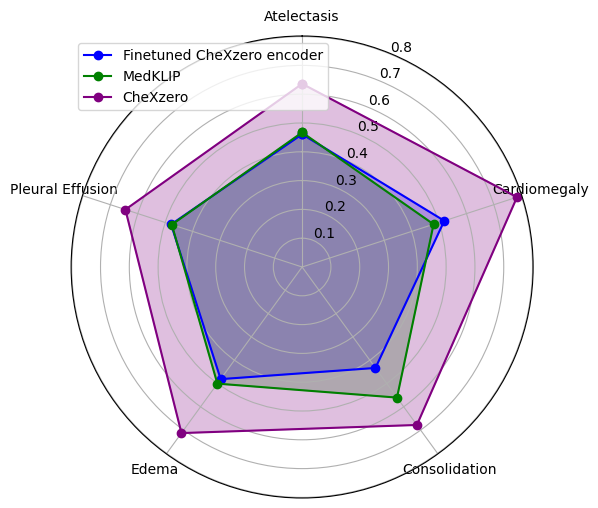

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Fixing duplicate labels issue

# Define categories without duplicate
categories = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']

# Add first value to the end to close the radar chart loop
chexzero_values = [0.588661, 0.456439, 0.476838, 0.521875, 0.511889]
medklip_values = [0.467244, 0.479947, 0.560478, 0.500595, 0.47577]
cheXzero_full_values = [0.63616	, 0.784501, 0.678013, 0.712779, 0.645221]
chexzero_values.append(chexzero_values[0])
medklip_values.append(medklip_values[0])
cheXzero_full_values.append(cheXzero_full_values[0])

# Compute the angle for each category
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]  # Close the loop

# Radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Plot data
ax.plot(angles, chexzero_values, label='Finetuned CheXzero encoder', color='blue', marker='o')
ax.fill(angles, chexzero_values, color='blue', alpha=0.25)

ax.plot(angles, medklip_values, label='MedKLIP', color='green', marker='o')
ax.fill(angles, medklip_values, color='green', alpha=0.25)

ax.plot(angles, cheXzero_full_values, label='CheXzero', color='purple', marker='o')
ax.fill(angles, cheXzero_full_values, color='purple', alpha=0.25)

# Labels and legend
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=10)
ax.yaxis.grid(True)
plt.legend(loc='upper left')

# Show plot
plt.title("")
plt.show()
